In [49]:
import os
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [50]:
np.random.seed(1232)
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\dep')
data = pd.read_csv("Rand_train.csv", sep=',')
data_val = pd.read_csv("Rand_valid.csv", sep=',')

In [51]:
data.cost = (np.exp(data.cost) - 0.5)*((data.cost != 0) * 1)
data_val.cost = (np.exp(data_val.cost) - 0.5)*((data_val.cost != 0) * 1)
data = shuffle(data).reset_index(drop=True)
data = data.drop(['fmde', 'lxghindx', 'lpi'], axis=1)
data_val = data_val.drop(['fmde', 'lxghindx', 'lpi'], axis=1)

In [52]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]
X_val = data_val.iloc[:,1:]
Y_val = data_val.iloc[:,0]

ranking = np.load('ranking.npy')

my_index = X.columns.values[ranking]
X2 = X[my_index]
X2_val = X_val[my_index]

In [53]:
cut = 5
y1 = (Y <= cut) * 1
y2 = (Y > cut) * (-1) * (-Y)
Y2 = np.stack((y1, y2), axis=-1)

y1_val = (Y_val <= cut) * 1
y2_val = (Y_val > cut) * (-1) * (-Y_val)
Y2_val = np.stack((y1_val, y2_val), axis=-1)

In [54]:
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\prog_calc')
from fit5_nn import fit, comb_error

In [55]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        
        self.fc11 = nn.Linear(16, 24, bias = True)
        self.fc12 = nn.Linear(24, 1, bias = True)
        
        self.fc21 = nn.Linear(16, 24, bias=True)
        self.fc22 = nn.Linear(24, 5, bias=True)
        self.fc23 = nn.Linear(5, 1, bias=True)
                
    def forward(self, x):
        x1 = torch.tanh(self.fc11(x))
        x1 = torch.sigmoid(self.fc12(x1))
        
        x2 = self.fc21(x)
        x2 = F.relu(self.fc22(x2))
        x2 = torch.exp(self.fc23(x2))       
        
        #x3 = torch.stack((x1[:,0], x2[:,0]), dim=1) 
        x3 = torch.cat((x1, x2), 1)
        return x3

In [62]:
n_epochs = 5000
lr = 0.001
verbose = 1
n_batches = 6
batch_to_avg = 2
ep_to_check = 10
clipping = 0.20
sig2 = 950000
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining6.pt'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [63]:
def m_error(output, target):
    return comb_error(output, target, sig2)

In [71]:
net = Net1()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)


#PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining6.pt'
#net.load_state_dict(torch.load(PATH, map_location = device))
    
a, b, c = fit(X=X2, X_val=X2_val, Y=Y2, Y_val=Y2_val, net=net, optimizer=optimizer, error=m_error, 
                n_epochs=n_epochs, n_batches=n_batches, batch_to_avg=batch_to_avg, 
                    ep_to_check=ep_to_check, clipping=clipping, PATH=PATH, device=device, 
                                            verbose=verbose, min_val_loss = float('inf'))

#(PENDIENTE)

Epoch 1: Training Loss: 0.9717774788538615, Validation Loss: 1.0782232284545898
Epoch 2: Training Loss: 0.9711610078811646, Validation Loss: 1.0771942138671875
Epoch 3: Training Loss: 0.9700781404972076, Validation Loss: 1.075798511505127
Epoch 4: Training Loss: 0.968693604071935, Validation Loss: 1.0741766691207886
Epoch 5: Training Loss: 0.9671683808167776, Validation Loss: 1.0724315643310547
Epoch 6: Training Loss: 0.965580811103185, Validation Loss: 1.0706367492675781
Epoch 7: Training Loss: 0.9639334479967753, Validation Loss: 1.0688445568084717
Epoch 8: Training Loss: 0.9623052974541982, Validation Loss: 1.0670901536941528
Epoch 9: Training Loss: 0.96078027288119, Validation Loss: 1.0653997659683228
Epoch 10: Training Loss: 0.9592113693555196, Validation Loss: 1.0637873411178589
Epoch 11: Training Loss: 0.9577128291130066, Validation Loss: 1.0622637271881104
New Checkpoint Saved into PATH
Epoch 12: Training Loss: 0.956424742937088, Validation Loss: 1.0608241558074951
Epoch 13: Tr

Epoch 100: Training Loss: 0.8910038471221924, Validation Loss: 0.9920296669006348
Epoch 101: Training Loss: 0.8905807038148245, Validation Loss: 0.9915974140167236
New Checkpoint Saved into PATH
Epoch 102: Training Loss: 0.8901851971944174, Validation Loss: 0.9911773800849915
Epoch 103: Training Loss: 0.8897871673107147, Validation Loss: 0.9907687306404114
Epoch 104: Training Loss: 0.8894078135490417, Validation Loss: 0.9903697967529297
Epoch 105: Training Loss: 0.8890341520309448, Validation Loss: 0.9899857044219971
Epoch 106: Training Loss: 0.8886768420537313, Validation Loss: 0.9896172285079956
Epoch 107: Training Loss: 0.8883197804292043, Validation Loss: 0.9892680048942566
Epoch 108: Training Loss: 0.8879934847354889, Validation Loss: 0.9889320731163025
Epoch 109: Training Loss: 0.887696752945582, Validation Loss: 0.9886088371276855
Epoch 110: Training Loss: 0.8873924513657888, Validation Loss: 0.9883033037185669
Epoch 111: Training Loss: 0.887121190627416, Validation Loss: 0.9880

Epoch 197: Training Loss: 0.8808590372403463, Validation Loss: 0.9818805456161499
Epoch 198: Training Loss: 0.8808432718118032, Validation Loss: 0.9818629622459412
Epoch 199: Training Loss: 0.8808195193608602, Validation Loss: 0.9818534255027771
Epoch 200: Training Loss: 0.8807976047197977, Validation Loss: 0.9818336963653564
Epoch 201: Training Loss: 0.8807808458805084, Validation Loss: 0.981810986995697
New Checkpoint Saved into PATH
Epoch 202: Training Loss: 0.8807584643363953, Validation Loss: 0.9817900061607361
Epoch 203: Training Loss: 0.8807348708311716, Validation Loss: 0.9817742705345154
Epoch 204: Training Loss: 0.8807158867518107, Validation Loss: 0.9817634224891663
Epoch 205: Training Loss: 0.8807007968425751, Validation Loss: 0.9817569255828857
Epoch 206: Training Loss: 0.8806763092676798, Validation Loss: 0.9817380905151367
Epoch 207: Training Loss: 0.8806604544321696, Validation Loss: 0.981712818145752
Epoch 208: Training Loss: 0.8806365927060446, Validation Loss: 0.9817

Epoch 294: Training Loss: 0.879201203584671, Validation Loss: 0.9805713891983032
Epoch 295: Training Loss: 0.8791871170202891, Validation Loss: 0.980559229850769
Epoch 296: Training Loss: 0.8791738351186117, Validation Loss: 0.9805252552032471
Epoch 297: Training Loss: 0.879157175620397, Validation Loss: 0.9805201888084412
Epoch 298: Training Loss: 0.8791475395361582, Validation Loss: 0.9805249571800232
Epoch 299: Training Loss: 0.8791264692942301, Validation Loss: 0.980506420135498
Epoch 300: Training Loss: 0.8791100084781647, Validation Loss: 0.9804887771606445
Epoch 301: Training Loss: 0.8790959517161051, Validation Loss: 0.9804735779762268
New Checkpoint Saved into PATH
Epoch 302: Training Loss: 0.8790861864884695, Validation Loss: 0.9804508686065674
Epoch 303: Training Loss: 0.8790662189324697, Validation Loss: 0.9804444909095764
Epoch 304: Training Loss: 0.879052480061849, Validation Loss: 0.9804403185844421
Epoch 305: Training Loss: 0.8790372709433237, Validation Loss: 0.9804389

Epoch 391: Training Loss: 0.877916008234024, Validation Loss: 0.9794802069664001
New Checkpoint Saved into PATH
Epoch 392: Training Loss: 0.877907931804657, Validation Loss: 0.9794607758522034
Epoch 393: Training Loss: 0.8778952459494272, Validation Loss: 0.9794607162475586
Epoch 394: Training Loss: 0.877891331911087, Validation Loss: 0.9794291257858276
Epoch 395: Training Loss: 0.8778823614120483, Validation Loss: 0.9794754981994629
Epoch 396: Training Loss: 0.8778553903102875, Validation Loss: 0.9794772267341614
Epoch 397: Training Loss: 0.8778452475865682, Validation Loss: 0.9794796705245972
Epoch 398: Training Loss: 0.8778358995914459, Validation Loss: 0.9795112609863281
Epoch 399: Training Loss: 0.8778234124183655, Validation Loss: 0.9795286059379578
Epoch 400: Training Loss: 0.8778099417686462, Validation Loss: 0.9795262813568115
Epoch 401: Training Loss: 0.8778006235758463, Validation Loss: 0.9795239567756653
New Checkpoint Saved into PATH
Epoch 402: Training Loss: 0.87779731551

Epoch 488: Training Loss: 0.876844733953476, Validation Loss: 0.978651762008667
Epoch 489: Training Loss: 0.8768289685249329, Validation Loss: 0.9786635637283325
Epoch 490: Training Loss: 0.8768169184525808, Validation Loss: 0.9786709547042847
Epoch 491: Training Loss: 0.8768086433410645, Validation Loss: 0.9786906242370605
New Checkpoint Saved into PATH
Epoch 492: Training Loss: 0.8767958184083303, Validation Loss: 0.9786922335624695
Epoch 493: Training Loss: 0.8767865498860677, Validation Loss: 0.9786916375160217
Epoch 494: Training Loss: 0.8767758011817932, Validation Loss: 0.9786953926086426
Epoch 495: Training Loss: 0.876768966515859, Validation Loss: 0.9787241816520691
Epoch 496: Training Loss: 0.8767565588156382, Validation Loss: 0.9787096977233887
Epoch 497: Training Loss: 0.8767451643943787, Validation Loss: 0.9786961078643799
Epoch 498: Training Loss: 0.876738448937734, Validation Loss: 0.9786818623542786
Epoch 499: Training Loss: 0.8767282962799072, Validation Loss: 0.978652

Epoch 585: Training Loss: 0.8759101033210754, Validation Loss: 0.9780499935150146
Epoch 586: Training Loss: 0.8759022951126099, Validation Loss: 0.9780453443527222
Epoch 587: Training Loss: 0.8758944968382517, Validation Loss: 0.9780819416046143
Epoch 588: Training Loss: 0.875887393951416, Validation Loss: 0.9781244993209839
Epoch 589: Training Loss: 0.8758817315101624, Validation Loss: 0.9781624674797058
Epoch 590: Training Loss: 0.8758663435777029, Validation Loss: 0.9781435132026672
Epoch 591: Training Loss: 0.8758559425671896, Validation Loss: 0.978127658367157
New Checkpoint Saved into PATH
Epoch 592: Training Loss: 0.8758470714092255, Validation Loss: 0.9780936241149902
Epoch 593: Training Loss: 0.8758408228556315, Validation Loss: 0.9780721664428711
Epoch 594: Training Loss: 0.8758322894573212, Validation Loss: 0.9780876040458679
Epoch 595: Training Loss: 0.8758219679196676, Validation Loss: 0.9780574440956116
Epoch 596: Training Loss: 0.8758144279321035, Validation Loss: 0.9780

Epoch 682: Training Loss: 0.875099649031957, Validation Loss: 0.9776557683944702
Epoch 683: Training Loss: 0.8750987549622854, Validation Loss: 0.9776824712753296
Epoch 684: Training Loss: 0.8750999172528585, Validation Loss: 0.9775943160057068
Epoch 685: Training Loss: 0.8750814000765482, Validation Loss: 0.9775474071502686
Epoch 686: Training Loss: 0.87507164478302, Validation Loss: 0.977561891078949
Epoch 687: Training Loss: 0.8750654558340708, Validation Loss: 0.9775413870811462
Epoch 688: Training Loss: 0.8750571807225546, Validation Loss: 0.9775820374488831
Epoch 689: Training Loss: 0.87504643201828, Validation Loss: 0.9775956273078918
Epoch 690: Training Loss: 0.8750376303990682, Validation Loss: 0.9776200652122498
Epoch 691: Training Loss: 0.8750349481900533, Validation Loss: 0.9776164889335632
New Checkpoint Saved into PATH
Epoch 692: Training Loss: 0.8750298619270325, Validation Loss: 0.977558970451355
Epoch 693: Training Loss: 0.8750191330909729, Validation Loss: 0.977533817

Epoch 780: Training Loss: 0.8743772506713867, Validation Loss: 0.9773340821266174
Epoch 781: Training Loss: 0.8743871053059896, Validation Loss: 0.9772688150405884
New Checkpoint Saved into PATH
Epoch 782: Training Loss: 0.8743645350138346, Validation Loss: 0.9772725701332092
Epoch 783: Training Loss: 0.8743581175804138, Validation Loss: 0.9773042798042297
Epoch 784: Training Loss: 0.8743482132752737, Validation Loss: 0.9773046970367432
Epoch 785: Training Loss: 0.8743453721205393, Validation Loss: 0.9773049354553223
Epoch 786: Training Loss: 0.8743357757727305, Validation Loss: 0.9772847890853882
Epoch 787: Training Loss: 0.8743281463781992, Validation Loss: 0.9772663712501526
Epoch 788: Training Loss: 0.874323825041453, Validation Loss: 0.977238655090332
Epoch 789: Training Loss: 0.8743148148059845, Validation Loss: 0.9772395491600037
Epoch 790: Training Loss: 0.8743185102939606, Validation Loss: 0.977303683757782
Epoch 791: Training Loss: 0.8743002116680145, Validation Loss: 0.97728

Epoch 878: Training Loss: 0.8737305303414663, Validation Loss: 0.9769307971000671
Epoch 879: Training Loss: 0.873727947473526, Validation Loss: 0.9769194722175598
Epoch 880: Training Loss: 0.8737169106801351, Validation Loss: 0.9769390821456909
Epoch 881: Training Loss: 0.8737097879250845, Validation Loss: 0.9769653081893921
New Checkpoint Saved into PATH
Epoch 882: Training Loss: 0.8737032314141592, Validation Loss: 0.9770023226737976
Epoch 883: Training Loss: 0.8737031916777293, Validation Loss: 0.9769715666770935
Epoch 884: Training Loss: 0.8737065692742666, Validation Loss: 0.9770641922950745
Epoch 885: Training Loss: 0.8736910820007324, Validation Loss: 0.9771173596382141
Epoch 886: Training Loss: 0.8736855983734131, Validation Loss: 0.9770708680152893
Epoch 887: Training Loss: 0.8736736377080282, Validation Loss: 0.9770790338516235
Epoch 888: Training Loss: 0.8736676673094431, Validation Loss: 0.9770421385765076
Epoch 889: Training Loss: 0.8736617763837179, Validation Loss: 0.976

Epoch 976: Training Loss: 0.8731340070565542, Validation Loss: 0.976744532585144
Epoch 977: Training Loss: 0.8731301128864288, Validation Loss: 0.9767513871192932
Epoch 978: Training Loss: 0.8731291989485422, Validation Loss: 0.9766914248466492
Epoch 979: Training Loss: 0.8731153309345245, Validation Loss: 0.9766957759857178
Epoch 980: Training Loss: 0.873111347357432, Validation Loss: 0.9767032265663147
Epoch 981: Training Loss: 0.8731042842070261, Validation Loss: 0.9767475128173828
New Checkpoint Saved into PATH
Epoch 982: Training Loss: 0.8730968832969666, Validation Loss: 0.9767600893974304
Epoch 983: Training Loss: 0.8730940818786621, Validation Loss: 0.9767574667930603
Epoch 984: Training Loss: 0.8730934262275696, Validation Loss: 0.9767131805419922
Epoch 985: Training Loss: 0.8730800449848175, Validation Loss: 0.9767469763755798
Epoch 986: Training Loss: 0.8730805218219757, Validation Loss: 0.9767293334007263
Epoch 987: Training Loss: 0.8730752964814504, Validation Loss: 0.9767

Epoch 1073: Training Loss: 0.872592031955719, Validation Loss: 0.9766085147857666
Epoch 1074: Training Loss: 0.8725939691066742, Validation Loss: 0.9765138626098633
Epoch 1075: Training Loss: 0.8725851476192474, Validation Loss: 0.9764596819877625
Epoch 1076: Training Loss: 0.8725789288679758, Validation Loss: 0.9764407277107239
Epoch 1077: Training Loss: 0.8725700179735819, Validation Loss: 0.9764349460601807
Epoch 1078: Training Loss: 0.8725704948107401, Validation Loss: 0.9765166640281677
Epoch 1079: Training Loss: 0.8725582957267761, Validation Loss: 0.976551353931427
Epoch 1080: Training Loss: 0.8725538452466329, Validation Loss: 0.9765344262123108
Epoch 1081: Training Loss: 0.8725490470727285, Validation Loss: 0.97651606798172
New Checkpoint Saved into PATH
Epoch 1082: Training Loss: 0.8725416560967764, Validation Loss: 0.9765408635139465
Epoch 1083: Training Loss: 0.8725408216317495, Validation Loss: 0.9765034317970276
Epoch 1084: Training Loss: 0.8725325365861257, Validation Lo

Epoch 1171: Training Loss: 0.8720837732156118, Validation Loss: 0.9763088822364807
Epoch 1172: Training Loss: 0.8720799187819163, Validation Loss: 0.9763086438179016
Epoch 1173: Training Loss: 0.8720730841159821, Validation Loss: 0.9762704968452454
Epoch 1174: Training Loss: 0.8720687925815582, Validation Loss: 0.976243257522583
Epoch 1175: Training Loss: 0.8720661401748657, Validation Loss: 0.9762169718742371
Epoch 1176: Training Loss: 0.8720611135164896, Validation Loss: 0.97621089220047
Epoch 1177: Training Loss: 0.8720566034317017, Validation Loss: 0.9762979745864868
Epoch 1178: Training Loss: 0.872047076622645, Validation Loss: 0.9764026999473572
Epoch 1179: Training Loss: 0.8720450599988302, Validation Loss: 0.9764677882194519
Epoch 1180: Training Loss: 0.8720413545767466, Validation Loss: 0.9764465093612671
Epoch 1181: Training Loss: 0.8720401922861735, Validation Loss: 0.9764658808708191
Epoch 1182: Training Loss: 0.8720299303531647, Validation Loss: 0.9764254689216614
Epoch 11

Epoch 1269: Training Loss: 0.8716118037700653, Validation Loss: 0.9761540293693542
Epoch 1270: Training Loss: 0.8716174364089966, Validation Loss: 0.9762263298034668
Epoch 1271: Training Loss: 0.8716062108675638, Validation Loss: 0.976228654384613
New Checkpoint Saved into PATH
Epoch 1272: Training Loss: 0.8716081380844116, Validation Loss: 0.9761238694190979
Epoch 1273: Training Loss: 0.8715929985046387, Validation Loss: 0.9760950207710266
Epoch 1274: Training Loss: 0.8715932468573252, Validation Loss: 0.9760448336601257
Epoch 1275: Training Loss: 0.8715850214163462, Validation Loss: 0.9760553240776062
Epoch 1276: Training Loss: 0.8715809086958567, Validation Loss: 0.9760385751724243
Epoch 1277: Training Loss: 0.8715772132078806, Validation Loss: 0.9760653972625732
Epoch 1278: Training Loss: 0.8715791900952657, Validation Loss: 0.9761245846748352
Epoch 1279: Training Loss: 0.8715690076351166, Validation Loss: 0.9761189222335815
Epoch 1280: Training Loss: 0.8715603550275167, Validation

Epoch 1367: Training Loss: 0.871163934469223, Validation Loss: 0.9758132100105286
Epoch 1368: Training Loss: 0.8711611231168112, Validation Loss: 0.9758037328720093
Epoch 1369: Training Loss: 0.8711538910865784, Validation Loss: 0.9758445024490356
Epoch 1370: Training Loss: 0.87115079164505, Validation Loss: 0.9758486151695251
Epoch 1371: Training Loss: 0.8711553315321604, Validation Loss: 0.9757903218269348
New Checkpoint Saved into PATH
Epoch 1372: Training Loss: 0.8711551626523336, Validation Loss: 0.9758917093276978
Epoch 1373: Training Loss: 0.8711422582467397, Validation Loss: 0.9759228825569153
Epoch 1374: Training Loss: 0.8711395859718323, Validation Loss: 0.975996196269989
Epoch 1375: Training Loss: 0.8711309333642324, Validation Loss: 0.9759697914123535
Epoch 1376: Training Loss: 0.8711332182089487, Validation Loss: 0.9758985638618469
Epoch 1377: Training Loss: 0.8711198965708414, Validation Loss: 0.9759124517440796
Epoch 1378: Training Loss: 0.8711192905902863, Validation Lo

Epoch 1465: Training Loss: 0.8707462052504221, Validation Loss: 0.9757609367370605
Epoch 1466: Training Loss: 0.8707315822442373, Validation Loss: 0.9757415056228638
Epoch 1467: Training Loss: 0.8707282046477, Validation Loss: 0.9757223725318909
Epoch 1468: Training Loss: 0.8707377711931864, Validation Loss: 0.9755852818489075
Epoch 1469: Training Loss: 0.8707192242145538, Validation Loss: 0.9755372405052185
Epoch 1470: Training Loss: 0.8707122802734375, Validation Loss: 0.9755678176879883
Epoch 1471: Training Loss: 0.8707068860530853, Validation Loss: 0.9755410552024841
Epoch 1472: Training Loss: 0.8707195719083151, Validation Loss: 0.9754326343536377
Epoch 1473: Training Loss: 0.8707071642080942, Validation Loss: 0.9753707051277161
Epoch 1474: Training Loss: 0.870706190665563, Validation Loss: 0.975464403629303
Epoch 1475: Training Loss: 0.8707052866617838, Validation Loss: 0.975579023361206
Epoch 1476: Training Loss: 0.8706870575745901, Validation Loss: 0.9755467176437378
Epoch 1477

Epoch 1562: Training Loss: 0.8703089654445648, Validation Loss: 0.9753547310829163
Epoch 1563: Training Loss: 0.8703054885069529, Validation Loss: 0.9753261208534241
Epoch 1564: Training Loss: 0.8702955742677053, Validation Loss: 0.9753499627113342
Epoch 1565: Training Loss: 0.8702927927176157, Validation Loss: 0.9753844141960144
Epoch 1566: Training Loss: 0.8702872395515442, Validation Loss: 0.9753483533859253
Epoch 1567: Training Loss: 0.8702824910481771, Validation Loss: 0.9753211736679077
Epoch 1568: Training Loss: 0.8702793220678965, Validation Loss: 0.9752731323242188
Epoch 1569: Training Loss: 0.8702728947003683, Validation Loss: 0.9752645492553711
Epoch 1570: Training Loss: 0.8702737788359324, Validation Loss: 0.9753096103668213
Epoch 1571: Training Loss: 0.8702823023001353, Validation Loss: 0.9751766920089722
Epoch 1572: Training Loss: 0.8702619870503744, Validation Loss: 0.975181519985199
Epoch 1573: Training Loss: 0.8702579041322073, Validation Loss: 0.9752252101898193
Epoch

Epoch 1660: Training Loss: 0.8698465923468272, Validation Loss: 0.9749018549919128
Epoch 1661: Training Loss: 0.869843602180481, Validation Loss: 0.9749053716659546
Epoch 1662: Training Loss: 0.8698378205299377, Validation Loss: 0.9748839139938354
Epoch 1663: Training Loss: 0.8698320885499319, Validation Loss: 0.9748930335044861
Epoch 1664: Training Loss: 0.8698319296042124, Validation Loss: 0.9748468399047852
Epoch 1665: Training Loss: 0.869823674360911, Validation Loss: 0.9748897552490234
Epoch 1666: Training Loss: 0.8698226114114126, Validation Loss: 0.974880039691925
Epoch 1667: Training Loss: 0.8698115448156992, Validation Loss: 0.9748476147651672
Epoch 1668: Training Loss: 0.8698089321454366, Validation Loss: 0.974884033203125
Epoch 1669: Training Loss: 0.8698109785715739, Validation Loss: 0.9748057723045349
Epoch 1670: Training Loss: 0.8698013325532278, Validation Loss: 0.9748636484146118
Epoch 1671: Training Loss: 0.869791716337204, Validation Loss: 0.9749257564544678
New Check

Epoch 1757: Training Loss: 0.8693058590094248, Validation Loss: 0.9743504524230957
Epoch 1758: Training Loss: 0.8693014880021414, Validation Loss: 0.9744300842285156
Epoch 1759: Training Loss: 0.8692955672740936, Validation Loss: 0.9744549989700317
Epoch 1760: Training Loss: 0.8692863782246908, Validation Loss: 0.974461555480957
Epoch 1761: Training Loss: 0.8692835768063863, Validation Loss: 0.9744738936424255
New Checkpoint Saved into PATH
Epoch 1762: Training Loss: 0.8692734241485596, Validation Loss: 0.9744142889976501
Epoch 1763: Training Loss: 0.8692674239476522, Validation Loss: 0.9744027256965637
Epoch 1764: Training Loss: 0.8692614932854971, Validation Loss: 0.9743556976318359
Epoch 1765: Training Loss: 0.8692580362161001, Validation Loss: 0.974261999130249
Epoch 1766: Training Loss: 0.8692485888799032, Validation Loss: 0.974256157875061
Epoch 1767: Training Loss: 0.8692430754502615, Validation Loss: 0.9742494225502014
Epoch 1768: Training Loss: 0.8692379593849182, Validation L

Epoch 1853: Training Loss: 0.8684825400511423, Validation Loss: 0.9733254909515381
Epoch 1854: Training Loss: 0.8684681355953217, Validation Loss: 0.9733871817588806
Epoch 1855: Training Loss: 0.8684576650460561, Validation Loss: 0.973354160785675
Epoch 1856: Training Loss: 0.8684447010358175, Validation Loss: 0.973438560962677
Epoch 1857: Training Loss: 0.868431935707728, Validation Loss: 0.9735128283500671
Epoch 1858: Training Loss: 0.8684159914652506, Validation Loss: 0.9735069870948792
Epoch 1859: Training Loss: 0.8684199750423431, Validation Loss: 0.9736394882202148
Epoch 1860: Training Loss: 0.8683930138746897, Validation Loss: 0.9736274480819702
Epoch 1861: Training Loss: 0.8683787186940511, Validation Loss: 0.9735733866691589
New Checkpoint Saved into PATH
Epoch 1862: Training Loss: 0.8683667480945587, Validation Loss: 0.9735395908355713
Epoch 1863: Training Loss: 0.868352065483729, Validation Loss: 0.9734435081481934
Epoch 1864: Training Loss: 0.8683378199736277, Validation Lo

Epoch 1949: Training Loss: 0.8657112121582031, Validation Loss: 0.9698767066001892
Epoch 1950: Training Loss: 0.865634818871816, Validation Loss: 0.9697090983390808
Epoch 1951: Training Loss: 0.8655575712521871, Validation Loss: 0.9695401191711426
New Checkpoint Saved into PATH
Epoch 1952: Training Loss: 0.8654652734597524, Validation Loss: 0.9695063829421997
Epoch 1953: Training Loss: 0.8653730650742849, Validation Loss: 0.9694485068321228
Epoch 1954: Training Loss: 0.8652777175108591, Validation Loss: 0.9692970514297485
Epoch 1955: Training Loss: 0.8651815752188364, Validation Loss: 0.9691396355628967
Epoch 1956: Training Loss: 0.8650830984115601, Validation Loss: 0.9690824151039124
Epoch 1957: Training Loss: 0.8649715582529703, Validation Loss: 0.9689909219741821
Epoch 1958: Training Loss: 0.8648611505826315, Validation Loss: 0.9688761234283447
Epoch 1959: Training Loss: 0.8647478123505911, Validation Loss: 0.9687095880508423
Epoch 1960: Training Loss: 0.8646289308865865, Validation

Epoch 2045: Training Loss: 0.8250954151153564, Validation Loss: 0.9138126969337463
Epoch 2046: Training Loss: 0.8249658942222595, Validation Loss: 0.9136168360710144
Epoch 2047: Training Loss: 0.8248256742954254, Validation Loss: 0.9133205413818359
Epoch 2048: Training Loss: 0.8246854444344839, Validation Loss: 0.9130439758300781
Epoch 2049: Training Loss: 0.8245565593242645, Validation Loss: 0.9127287864685059
Epoch 2050: Training Loss: 0.8244619270165762, Validation Loss: 0.9125227332115173
Epoch 2051: Training Loss: 0.8243086338043213, Validation Loss: 0.9122466444969177
New Checkpoint Saved into PATH
Epoch 2052: Training Loss: 0.8241799275080363, Validation Loss: 0.9118468165397644
Epoch 2053: Training Loss: 0.8240775267283121, Validation Loss: 0.9115683436393738
Epoch 2054: Training Loss: 0.8239472011725107, Validation Loss: 0.9112223386764526
Epoch 2055: Training Loss: 0.8238396048545837, Validation Loss: 0.9110217094421387
Epoch 2056: Training Loss: 0.8237233559290568, Validatio

Epoch 2141: Training Loss: 0.8174822727839152, Validation Loss: 0.8950290083885193
New Checkpoint Saved into PATH
Epoch 2142: Training Loss: 0.8174524207909902, Validation Loss: 0.8948980569839478
Epoch 2143: Training Loss: 0.8173832297325134, Validation Loss: 0.8947855234146118
Epoch 2144: Training Loss: 0.8173277974128723, Validation Loss: 0.8946036100387573
Epoch 2145: Training Loss: 0.8172872960567474, Validation Loss: 0.8944699764251709
Epoch 2146: Training Loss: 0.817224383354187, Validation Loss: 0.8943983912467957
Epoch 2147: Training Loss: 0.8171920975049337, Validation Loss: 0.8943294286727905
Epoch 2148: Training Loss: 0.8171548346678416, Validation Loss: 0.8941654562950134
Epoch 2149: Training Loss: 0.8171177208423615, Validation Loss: 0.8940439820289612
Epoch 2150: Training Loss: 0.817059189081192, Validation Loss: 0.8938968777656555
Epoch 2151: Training Loss: 0.8170239925384521, Validation Loss: 0.8937696814537048
New Checkpoint Saved into PATH
Epoch 2152: Training Loss: 

Epoch 2237: Training Loss: 0.814257949590683, Validation Loss: 0.8857318758964539
Epoch 2238: Training Loss: 0.8142410715421041, Validation Loss: 0.8856072425842285
Epoch 2239: Training Loss: 0.8142333726088206, Validation Loss: 0.8853981494903564
Epoch 2240: Training Loss: 0.8141946792602539, Validation Loss: 0.8853203654289246
Epoch 2241: Training Loss: 0.8141760428746542, Validation Loss: 0.8853216171264648
New Checkpoint Saved into PATH
Epoch 2242: Training Loss: 0.8142027954260508, Validation Loss: 0.885495662689209
Epoch 2243: Training Loss: 0.814142515261968, Validation Loss: 0.8855929374694824
Epoch 2244: Training Loss: 0.8141497472922007, Validation Loss: 0.8856328129768372
Epoch 2245: Training Loss: 0.8141110638777415, Validation Loss: 0.8855085372924805
Epoch 2246: Training Loss: 0.814094473918279, Validation Loss: 0.8855069279670715
Epoch 2247: Training Loss: 0.814065565665563, Validation Loss: 0.8856321573257446
Epoch 2248: Training Loss: 0.8140741586685181, Validation Los

Epoch 2333: Training Loss: 0.8127394815286001, Validation Loss: 0.8815164566040039
Epoch 2334: Training Loss: 0.8127101063728333, Validation Loss: 0.8814940452575684
Epoch 2335: Training Loss: 0.8127109408378601, Validation Loss: 0.8812960386276245
Epoch 2336: Training Loss: 0.8126686712106069, Validation Loss: 0.8811938762664795
Epoch 2337: Training Loss: 0.8126601080099741, Validation Loss: 0.8812135457992554
Epoch 2338: Training Loss: 0.812654991944631, Validation Loss: 0.8813219666481018
Epoch 2339: Training Loss: 0.812661369641622, Validation Loss: 0.8815999627113342
Epoch 2340: Training Loss: 0.8126373191674551, Validation Loss: 0.8816641569137573
Epoch 2341: Training Loss: 0.8126817842324575, Validation Loss: 0.8815173506736755
New Checkpoint Saved into PATH
Epoch 2342: Training Loss: 0.8126118183135986, Validation Loss: 0.88149493932724
Epoch 2343: Training Loss: 0.8126329878966013, Validation Loss: 0.8815298676490784
Epoch 2344: Training Loss: 0.8126028676827749, Validation Lo

Epoch 2430: Training Loss: 0.8116345008214315, Validation Loss: 0.8784559369087219
Epoch 2431: Training Loss: 0.8116181691487631, Validation Loss: 0.8784359097480774
New Checkpoint Saved into PATH
Epoch 2432: Training Loss: 0.8116406500339508, Validation Loss: 0.8782910704612732
Epoch 2433: Training Loss: 0.8116084933280945, Validation Loss: 0.8782252073287964
Epoch 2434: Training Loss: 0.8116151293118795, Validation Loss: 0.8781179189682007
Epoch 2435: Training Loss: 0.811613659063975, Validation Loss: 0.8781960010528564
Epoch 2436: Training Loss: 0.8115899960199991, Validation Loss: 0.8783127069473267
Epoch 2437: Training Loss: 0.8115626275539398, Validation Loss: 0.8783630132675171
Epoch 2438: Training Loss: 0.8115597665309906, Validation Loss: 0.8784239292144775
Epoch 2439: Training Loss: 0.8115345537662506, Validation Loss: 0.8784987330436707
Epoch 2440: Training Loss: 0.8115617434183756, Validation Loss: 0.8785016536712646
Epoch 2441: Training Loss: 0.8115520079930624, Validation

Epoch 2526: Training Loss: 0.8107781012852987, Validation Loss: 0.8769457936286926
Epoch 2527: Training Loss: 0.8107747336228689, Validation Loss: 0.8769491314888
Epoch 2528: Training Loss: 0.8107828001181284, Validation Loss: 0.8766897916793823
Epoch 2529: Training Loss: 0.8107626537481943, Validation Loss: 0.8766060471534729
Epoch 2530: Training Loss: 0.8107678492863973, Validation Loss: 0.8764016628265381
Epoch 2531: Training Loss: 0.8107583820819855, Validation Loss: 0.8764278888702393
New Checkpoint Saved into PATH
Epoch 2532: Training Loss: 0.8107617696126302, Validation Loss: 0.8763410449028015
Epoch 2533: Training Loss: 0.8107340037822723, Validation Loss: 0.8764798045158386
Epoch 2534: Training Loss: 0.810719629128774, Validation Loss: 0.8766558766365051
Epoch 2535: Training Loss: 0.8107636074225107, Validation Loss: 0.8770137429237366
Epoch 2536: Training Loss: 0.8106970687707266, Validation Loss: 0.8771560788154602
Epoch 2537: Training Loss: 0.810743381579717, Validation Los

Epoch 2623: Training Loss: 0.8099877933661143, Validation Loss: 0.8754659295082092
Epoch 2624: Training Loss: 0.8100333114465078, Validation Loss: 0.8759843707084656
Epoch 2625: Training Loss: 0.8100320796171824, Validation Loss: 0.87629634141922
Epoch 2626: Training Loss: 0.8100700179735819, Validation Loss: 0.8765043616294861
Epoch 2627: Training Loss: 0.8100458979606628, Validation Loss: 0.8763221502304077
Epoch 2628: Training Loss: 0.8100039263566335, Validation Loss: 0.875961422920227
Epoch 2629: Training Loss: 0.8099566102027893, Validation Loss: 0.8757510781288147
Epoch 2630: Training Loss: 0.8099529643853506, Validation Loss: 0.8753804564476013
Epoch 2631: Training Loss: 0.8099456826845804, Validation Loss: 0.8750811219215393
Epoch 2632: Training Loss: 0.8099522193272909, Validation Loss: 0.8748050332069397
Epoch 2633: Training Loss: 0.8099255263805389, Validation Loss: 0.8748545050621033
Epoch 2634: Training Loss: 0.8099295993645986, Validation Loss: 0.8750219345092773
Epoch 2

Epoch 2721: Training Loss: 0.809295246998469, Validation Loss: 0.874622642993927
New Checkpoint Saved into PATH
Epoch 2722: Training Loss: 0.809311588605245, Validation Loss: 0.8749125003814697
Epoch 2723: Training Loss: 0.8092875083287557, Validation Loss: 0.8748688101768494
Epoch 2724: Training Loss: 0.8092836936314901, Validation Loss: 0.8747997879981995
Epoch 2725: Training Loss: 0.8092799683411916, Validation Loss: 0.8747280836105347
Epoch 2726: Training Loss: 0.8092590669790903, Validation Loss: 0.8747237920761108
Epoch 2727: Training Loss: 0.8092628121376038, Validation Loss: 0.874591588973999
Epoch 2728: Training Loss: 0.8092461327711741, Validation Loss: 0.8745121359825134
Epoch 2729: Training Loss: 0.8092415630817413, Validation Loss: 0.8744070529937744
Epoch 2730: Training Loss: 0.8092403610547384, Validation Loss: 0.8743446469306946
Epoch 2731: Training Loss: 0.8092301885286967, Validation Loss: 0.8744190335273743
Epoch 2732: Training Loss: 0.809220681587855, Validation Los

Epoch 2819: Training Loss: 0.8086222410202026, Validation Loss: 0.8737851977348328
Epoch 2820: Training Loss: 0.8086224595705668, Validation Loss: 0.8739357590675354
Epoch 2821: Training Loss: 0.808618942896525, Validation Loss: 0.8739365339279175
New Checkpoint Saved into PATH
Epoch 2822: Training Loss: 0.8086199363072714, Validation Loss: 0.8739842176437378
Epoch 2823: Training Loss: 0.8086248139540354, Validation Loss: 0.8742836117744446
Epoch 2824: Training Loss: 0.8086176117261251, Validation Loss: 0.8742552995681763
Epoch 2825: Training Loss: 0.8086034655570984, Validation Loss: 0.8740982413291931
Epoch 2826: Training Loss: 0.8085855841636658, Validation Loss: 0.8738929629325867
Epoch 2827: Training Loss: 0.8085730969905853, Validation Loss: 0.8736959099769592
Epoch 2828: Training Loss: 0.8085518578688303, Validation Loss: 0.8734778165817261
Epoch 2829: Training Loss: 0.8085557421048483, Validation Loss: 0.8733165860176086
Epoch 2830: Training Loss: 0.8085529704888662, Validation

Epoch 2917: Training Loss: 0.8080166776974996, Validation Loss: 0.8731801509857178
Epoch 2918: Training Loss: 0.8080052932103475, Validation Loss: 0.8732115030288696
Epoch 2919: Training Loss: 0.8079935212930044, Validation Loss: 0.8732250928878784
Epoch 2920: Training Loss: 0.8079950312773386, Validation Loss: 0.8732200264930725
Epoch 2921: Training Loss: 0.8079779843489329, Validation Loss: 0.8730111122131348
Epoch 2922: Training Loss: 0.8079786400000254, Validation Loss: 0.8728004693984985
Epoch 2923: Training Loss: 0.8079966604709625, Validation Loss: 0.8731028437614441
Epoch 2924: Training Loss: 0.8079729775587717, Validation Loss: 0.8733453750610352
Epoch 2925: Training Loss: 0.8079836765925089, Validation Loss: 0.8730654716491699
Epoch 2926: Training Loss: 0.8079376518726349, Validation Loss: 0.8729655146598816
Epoch 2927: Training Loss: 0.807952215274175, Validation Loss: 0.8729419112205505
Epoch 2928: Training Loss: 0.8079317510128021, Validation Loss: 0.8727826476097107
Epoch

Epoch 3015: Training Loss: 0.8074357211589813, Validation Loss: 0.8716872334480286
Epoch 3016: Training Loss: 0.8074006835619608, Validation Loss: 0.8714778423309326
Epoch 3017: Training Loss: 0.8074128528436025, Validation Loss: 0.8716569542884827
Epoch 3018: Training Loss: 0.8074349661668142, Validation Loss: 0.8721054792404175
Epoch 3019: Training Loss: 0.8073810736338297, Validation Loss: 0.8722093105316162
Epoch 3020: Training Loss: 0.807369609673818, Validation Loss: 0.8720973134040833
Epoch 3021: Training Loss: 0.8074251810709635, Validation Loss: 0.8719640970230103
Epoch 3022: Training Loss: 0.8073544104894003, Validation Loss: 0.8719512820243835
Epoch 3023: Training Loss: 0.8073553542296091, Validation Loss: 0.8719825744628906
Epoch 3024: Training Loss: 0.8073599636554718, Validation Loss: 0.8722154498100281
Epoch 3025: Training Loss: 0.8073522547880808, Validation Loss: 0.8723176121711731
Epoch 3026: Training Loss: 0.8073736627896627, Validation Loss: 0.8721211552619934
Epoch

Epoch 3114: Training Loss: 0.8068143924077352, Validation Loss: 0.8714058995246887
Epoch 3115: Training Loss: 0.806795060634613, Validation Loss: 0.8713955283164978
Epoch 3116: Training Loss: 0.8067824641863505, Validation Loss: 0.8716724514961243
Epoch 3117: Training Loss: 0.8067673842112223, Validation Loss: 0.8716967105865479
Epoch 3118: Training Loss: 0.8067749937375387, Validation Loss: 0.8715998530387878
Epoch 3119: Training Loss: 0.80676997701327, Validation Loss: 0.8715044260025024
Epoch 3120: Training Loss: 0.8067509631315867, Validation Loss: 0.8714593648910522
Epoch 3121: Training Loss: 0.8067531784375509, Validation Loss: 0.871522843837738
Epoch 3122: Training Loss: 0.8067428668340048, Validation Loss: 0.871523916721344
Epoch 3123: Training Loss: 0.8067467510700226, Validation Loss: 0.8714544177055359
Epoch 3124: Training Loss: 0.8067462344964346, Validation Loss: 0.8716240525245667
Epoch 3125: Training Loss: 0.8067279656728109, Validation Loss: 0.871715784072876
Epoch 3126

Epoch 3212: Training Loss: 0.8063058257102966, Validation Loss: 0.8721258044242859
Epoch 3213: Training Loss: 0.8062756856282552, Validation Loss: 0.8718037009239197
Epoch 3214: Training Loss: 0.8062539796034495, Validation Loss: 0.871431291103363
Epoch 3215: Training Loss: 0.8062370220820109, Validation Loss: 0.8713522553443909
Epoch 3216: Training Loss: 0.8062420388062795, Validation Loss: 0.8714858889579773
Epoch 3217: Training Loss: 0.8062370717525482, Validation Loss: 0.8715065717697144
Epoch 3218: Training Loss: 0.8062300384044647, Validation Loss: 0.871703028678894
Epoch 3219: Training Loss: 0.8062290449937185, Validation Loss: 0.8716601133346558
Epoch 3220: Training Loss: 0.8062158723672231, Validation Loss: 0.8715963959693909
Epoch 3221: Training Loss: 0.8062339226404825, Validation Loss: 0.8716839551925659
Epoch 3222: Training Loss: 0.8062170843283335, Validation Loss: 0.8716001510620117
Epoch 3223: Training Loss: 0.8062464694182078, Validation Loss: 0.871720016002655
Epoch 3

Epoch 3311: Training Loss: 0.8058435221513113, Validation Loss: 0.8704586029052734
Epoch 3312: Training Loss: 0.8058256308237711, Validation Loss: 0.8705460429191589
Epoch 3313: Training Loss: 0.8057758609453837, Validation Loss: 0.870795726776123
Epoch 3314: Training Loss: 0.8057605425516764, Validation Loss: 0.8709126114845276
Epoch 3315: Training Loss: 0.8057507872581482, Validation Loss: 0.8710711598396301
Epoch 3316: Training Loss: 0.8057537575562795, Validation Loss: 0.871029794216156
Epoch 3317: Training Loss: 0.8057587643464407, Validation Loss: 0.8711658716201782
Epoch 3318: Training Loss: 0.8057724634806315, Validation Loss: 0.8708317875862122
Epoch 3319: Training Loss: 0.8057361443837484, Validation Loss: 0.870671272277832
Epoch 3320: Training Loss: 0.8057621320088705, Validation Loss: 0.8706525564193726
Epoch 3321: Training Loss: 0.8057298560937246, Validation Loss: 0.8709707260131836
Epoch 3322: Training Loss: 0.8057056069374084, Validation Loss: 0.8713052272796631
Epoch 3

Epoch 3409: Training Loss: 0.8053386906782786, Validation Loss: 0.8710606098175049
Epoch 3410: Training Loss: 0.8053319255510966, Validation Loss: 0.8709144592285156
Epoch 3411: Training Loss: 0.8053550819555918, Validation Loss: 0.8705015182495117
Epoch 3412: Training Loss: 0.8053262531757355, Validation Loss: 0.8702327013015747
Epoch 3413: Training Loss: 0.8053797086079916, Validation Loss: 0.8699111938476562
Epoch 3414: Training Loss: 0.8053437968095144, Validation Loss: 0.8699213266372681
Epoch 3415: Training Loss: 0.8053275545438131, Validation Loss: 0.8699113130569458
Epoch 3416: Training Loss: 0.8053410053253174, Validation Loss: 0.869810938835144
Epoch 3417: Training Loss: 0.8053233027458191, Validation Loss: 0.8699808120727539
Epoch 3418: Training Loss: 0.8053049743175507, Validation Loss: 0.8701748251914978
Epoch 3419: Training Loss: 0.8053325513998667, Validation Loss: 0.8699259757995605
Epoch 3420: Training Loss: 0.8053041994571686, Validation Loss: 0.8699679374694824
Epoch

Epoch 3508: Training Loss: 0.8049001693725586, Validation Loss: 0.8704577088356018
Epoch 3509: Training Loss: 0.804887721935908, Validation Loss: 0.8705047965049744
Epoch 3510: Training Loss: 0.8048881590366364, Validation Loss: 0.8703719973564148
Epoch 3511: Training Loss: 0.8048944671948751, Validation Loss: 0.8703697919845581
Epoch 3512: Training Loss: 0.8049010833104452, Validation Loss: 0.8706867098808289
Epoch 3513: Training Loss: 0.8048673669497172, Validation Loss: 0.8707871437072754
Epoch 3514: Training Loss: 0.8048583169778188, Validation Loss: 0.87061607837677
Epoch 3515: Training Loss: 0.8048474490642548, Validation Loss: 0.8703641295433044
Epoch 3516: Training Loss: 0.8048501312732697, Validation Loss: 0.8700749278068542
Epoch 3517: Training Loss: 0.8048491974671682, Validation Loss: 0.8701035976409912
Epoch 3518: Training Loss: 0.8048404653867086, Validation Loss: 0.870233416557312
Epoch 3519: Training Loss: 0.804857075214386, Validation Loss: 0.8704204559326172
Epoch 352

Epoch 3608: Training Loss: 0.8045179744561514, Validation Loss: 0.8702689409255981
Epoch 3609: Training Loss: 0.8044995069503784, Validation Loss: 0.8702617287635803
Epoch 3610: Training Loss: 0.8044858376185099, Validation Loss: 0.8702325820922852
Epoch 3611: Training Loss: 0.8045094907283783, Validation Loss: 0.8698648810386658
Epoch 3612: Training Loss: 0.8045053978761038, Validation Loss: 0.8698177337646484
Epoch 3613: Training Loss: 0.8044883708159128, Validation Loss: 0.8699633479118347
Epoch 3614: Training Loss: 0.8044728736082712, Validation Loss: 0.8699562549591064
Epoch 3615: Training Loss: 0.8044714530309042, Validation Loss: 0.8701608777046204
Epoch 3616: Training Loss: 0.8044617772102356, Validation Loss: 0.8703291416168213
Epoch 3617: Training Loss: 0.8044559061527252, Validation Loss: 0.8702482581138611
Epoch 3618: Training Loss: 0.804446150859197, Validation Loss: 0.8704119920730591
Epoch 3619: Training Loss: 0.8044447898864746, Validation Loss: 0.8706441521644592
Epoch

Epoch 3708: Training Loss: 0.8041684329509735, Validation Loss: 0.8694989681243896
Epoch 3709: Training Loss: 0.8041702012221018, Validation Loss: 0.8692827820777893
Epoch 3710: Training Loss: 0.8042130370934805, Validation Loss: 0.8689931631088257
Epoch 3711: Training Loss: 0.804198811451594, Validation Loss: 0.8690086007118225
Epoch 3712: Training Loss: 0.8041904171307882, Validation Loss: 0.8692487478256226
Epoch 3713: Training Loss: 0.8041453262170156, Validation Loss: 0.8694103956222534
Epoch 3714: Training Loss: 0.8041235903898875, Validation Loss: 0.8699164986610413
Epoch 3715: Training Loss: 0.8042068183422089, Validation Loss: 0.8707461357116699
Epoch 3716: Training Loss: 0.8040996889273325, Validation Loss: 0.8711155652999878
Epoch 3717: Training Loss: 0.8041274746259054, Validation Loss: 0.8709582090377808
Epoch 3718: Training Loss: 0.8040966093540192, Validation Loss: 0.8709684014320374
Epoch 3719: Training Loss: 0.8040855924288431, Validation Loss: 0.8707709908485413
Epoch

Epoch 3807: Training Loss: 0.8038064539432526, Validation Loss: 0.870353102684021
Epoch 3808: Training Loss: 0.8038714726765951, Validation Loss: 0.8698411583900452
Epoch 3809: Training Loss: 0.8038286368052164, Validation Loss: 0.8699828386306763
Epoch 3810: Training Loss: 0.8038374980290731, Validation Loss: 0.869970440864563
Epoch 3811: Training Loss: 0.8038060665130615, Validation Loss: 0.870358943939209
Epoch 3812: Training Loss: 0.8038155337174734, Validation Loss: 0.8707589507102966
Epoch 3813: Training Loss: 0.8037681182225546, Validation Loss: 0.8711495399475098
Epoch 3814: Training Loss: 0.8039186596870422, Validation Loss: 0.8719931244850159
Epoch 3815: Training Loss: 0.8039516309897105, Validation Loss: 0.8724197745323181
Epoch 3816: Training Loss: 0.8039905031522115, Validation Loss: 0.8723065853118896
Epoch 3817: Training Loss: 0.8039368987083435, Validation Loss: 0.8717070817947388
Epoch 3818: Training Loss: 0.8038617173830668, Validation Loss: 0.8707190752029419
Epoch 3

Epoch 3907: Training Loss: 0.8035342593987783, Validation Loss: 0.8699151277542114
Epoch 3908: Training Loss: 0.8035194277763367, Validation Loss: 0.8701056241989136
Epoch 3909: Training Loss: 0.8035115996996561, Validation Loss: 0.870451807975769
Epoch 3910: Training Loss: 0.803504079580307, Validation Loss: 0.8705786466598511
Epoch 3911: Training Loss: 0.803512692451477, Validation Loss: 0.8706123232841492
Epoch 3912: Training Loss: 0.8035743435223898, Validation Loss: 0.8710214495658875
Epoch 3913: Training Loss: 0.8035388390223185, Validation Loss: 0.8709132075309753
Epoch 3914: Training Loss: 0.8035237689812978, Validation Loss: 0.8706643581390381
Epoch 3915: Training Loss: 0.8034901320934296, Validation Loss: 0.870549201965332
Epoch 3916: Training Loss: 0.8034979204336802, Validation Loss: 0.8702614307403564
Epoch 3917: Training Loss: 0.8034997383753458, Validation Loss: 0.8701591491699219
Epoch 3918: Training Loss: 0.8035107652346293, Validation Loss: 0.8701286911964417
Epoch 39

Epoch 4007: Training Loss: 0.8032964964707693, Validation Loss: 0.8692799806594849
Epoch 4008: Training Loss: 0.8032878339290619, Validation Loss: 0.8695480823516846
Epoch 4009: Training Loss: 0.8032868305842081, Validation Loss: 0.869907021522522
Epoch 4010: Training Loss: 0.8032572666803995, Validation Loss: 0.8701719641685486
Epoch 4011: Training Loss: 0.8032424847284952, Validation Loss: 0.8702979683876038
Epoch 4012: Training Loss: 0.8032704095045725, Validation Loss: 0.8706074953079224
Epoch 4013: Training Loss: 0.8032511174678802, Validation Loss: 0.8706454038619995
Epoch 4014: Training Loss: 0.8032320042451223, Validation Loss: 0.8705040812492371
Epoch 4015: Training Loss: 0.803223172823588, Validation Loss: 0.8703756928443909
Epoch 4016: Training Loss: 0.8032159407933553, Validation Loss: 0.870300829410553
Epoch 4017: Training Loss: 0.8032378156979879, Validation Loss: 0.8702043890953064
Epoch 4018: Training Loss: 0.8032330671946207, Validation Loss: 0.8702000975608826
Epoch 4

Epoch 4107: Training Loss: 0.8030238548914591, Validation Loss: 0.8703321218490601
Epoch 4108: Training Loss: 0.8030265072981516, Validation Loss: 0.8702871203422546
Epoch 4109: Training Loss: 0.8030286828676859, Validation Loss: 0.8699764013290405
Epoch 4110: Training Loss: 0.8030708928902944, Validation Loss: 0.8702625632286072
Epoch 4111: Training Loss: 0.8030262688795725, Validation Loss: 0.8704227805137634
Epoch 4112: Training Loss: 0.8030663132667542, Validation Loss: 0.8701238036155701
Epoch 4113: Training Loss: 0.803083211183548, Validation Loss: 0.8696931004524231
Epoch 4114: Training Loss: 0.8030329048633575, Validation Loss: 0.8697766661643982
Epoch 4115: Training Loss: 0.8030438224474589, Validation Loss: 0.8700118064880371
Epoch 4116: Training Loss: 0.8030080497264862, Validation Loss: 0.870073676109314
Epoch 4117: Training Loss: 0.8030057648817698, Validation Loss: 0.8702268600463867
Epoch 4118: Training Loss: 0.8030001719792684, Validation Loss: 0.8703206181526184
Epoch 

Epoch 4206: Training Loss: 0.8028166989485422, Validation Loss: 0.8702910542488098
Epoch 4207: Training Loss: 0.8028039932250977, Validation Loss: 0.8703111410140991
Epoch 4208: Training Loss: 0.8028037846088409, Validation Loss: 0.8702526688575745
Epoch 4209: Training Loss: 0.8028062880039215, Validation Loss: 0.8704502582550049
Epoch 4210: Training Loss: 0.8028043806552887, Validation Loss: 0.8705790042877197
Epoch 4211: Training Loss: 0.8028237521648407, Validation Loss: 0.8704976439476013
Epoch 4212: Training Loss: 0.802842358748118, Validation Loss: 0.8706570267677307
Epoch 4213: Training Loss: 0.802852084239324, Validation Loss: 0.8704621195793152
Epoch 4214: Training Loss: 0.8027975459893545, Validation Loss: 0.8704262971878052
Epoch 4215: Training Loss: 0.8028018871943156, Validation Loss: 0.8705432415008545
Epoch 4216: Training Loss: 0.8028234442075094, Validation Loss: 0.870296061038971
Epoch 4217: Training Loss: 0.8028095066547394, Validation Loss: 0.870448648929596
Epoch 42

Epoch 4307: Training Loss: 0.8026300966739655, Validation Loss: 0.8715368509292603
Epoch 4308: Training Loss: 0.8026922841866811, Validation Loss: 0.8717519044876099
Epoch 4309: Training Loss: 0.8027229607105255, Validation Loss: 0.8717689514160156
Epoch 4310: Training Loss: 0.8026898006598154, Validation Loss: 0.8712767958641052
Epoch 4311: Training Loss: 0.8026350339253744, Validation Loss: 0.8708094954490662
Epoch 4312: Training Loss: 0.8026092946529388, Validation Loss: 0.8709713220596313
Epoch 4313: Training Loss: 0.8026010990142822, Validation Loss: 0.8710779547691345
Epoch 4314: Training Loss: 0.8026003837585449, Validation Loss: 0.8713521361351013
Epoch 4315: Training Loss: 0.8026292026042938, Validation Loss: 0.8713938593864441
Epoch 4316: Training Loss: 0.802637000878652, Validation Loss: 0.8712887763977051
Epoch 4317: Training Loss: 0.8026487529277802, Validation Loss: 0.8712738156318665
Epoch 4318: Training Loss: 0.8026413023471832, Validation Loss: 0.8713392615318298
Epoch

Epoch 4406: Training Loss: 0.8024645249048868, Validation Loss: 0.8703071475028992
Epoch 4407: Training Loss: 0.8024163444836935, Validation Loss: 0.8703457117080688
Epoch 4408: Training Loss: 0.8024164040883383, Validation Loss: 0.8702523112297058
Epoch 4409: Training Loss: 0.8024176359176636, Validation Loss: 0.8702871799468994
Epoch 4410: Training Loss: 0.8024157782395681, Validation Loss: 0.8703276515007019
Epoch 4411: Training Loss: 0.8023962080478668, Validation Loss: 0.8707792162895203
Epoch 4412: Training Loss: 0.8023928105831146, Validation Loss: 0.8710753917694092
Epoch 4413: Training Loss: 0.8023995757102966, Validation Loss: 0.87123042345047
Epoch 4414: Training Loss: 0.8023901184399923, Validation Loss: 0.8710199594497681
Epoch 4415: Training Loss: 0.8023975193500519, Validation Loss: 0.8705292344093323
Epoch 4416: Training Loss: 0.8023756841818491, Validation Loss: 0.870354175567627
Epoch 4417: Training Loss: 0.8024021287759145, Validation Loss: 0.8701902627944946
Epoch 4

Epoch 4507: Training Loss: 0.8022285600503286, Validation Loss: 0.8709219694137573
Epoch 4508: Training Loss: 0.8022172749042511, Validation Loss: 0.8709495663642883
Epoch 4509: Training Loss: 0.8022260467211405, Validation Loss: 0.8714163899421692
Epoch 4510: Training Loss: 0.8022530674934387, Validation Loss: 0.8719395995140076
Epoch 4511: Training Loss: 0.8022839824358622, Validation Loss: 0.8722638487815857
Epoch 4512: Training Loss: 0.8022642334302267, Validation Loss: 0.8720464110374451
Epoch 4513: Training Loss: 0.8022482693195343, Validation Loss: 0.8716580271720886
Epoch 4514: Training Loss: 0.8022106389204661, Validation Loss: 0.8714704513549805
Epoch 4515: Training Loss: 0.8021927773952484, Validation Loss: 0.8711967468261719
Epoch 4516: Training Loss: 0.8021858831246694, Validation Loss: 0.8709540963172913
Epoch 4517: Training Loss: 0.8021846016248068, Validation Loss: 0.8709849715232849
Epoch 4518: Training Loss: 0.8022001187006632, Validation Loss: 0.8707603216171265
Epoc

Epoch 4606: Training Loss: 0.8020146191120148, Validation Loss: 0.8715270757675171
Epoch 4607: Training Loss: 0.8020200431346893, Validation Loss: 0.8716104030609131
Epoch 4608: Training Loss: 0.8020080427328745, Validation Loss: 0.871381938457489
Epoch 4609: Training Loss: 0.8020062446594238, Validation Loss: 0.8710402846336365
Epoch 4610: Training Loss: 0.8020179271697998, Validation Loss: 0.8708726167678833
Epoch 4611: Training Loss: 0.8020537296930949, Validation Loss: 0.870625913143158
Epoch 4612: Training Loss: 0.8020575145880381, Validation Loss: 0.8706915974617004
Epoch 4613: Training Loss: 0.8020418186982473, Validation Loss: 0.8706369400024414
Epoch 4614: Training Loss: 0.8021377225716909, Validation Loss: 0.8711767196655273
Epoch 4615: Training Loss: 0.8019825418790182, Validation Loss: 0.8711953163146973
Epoch 4616: Training Loss: 0.8019813001155853, Validation Loss: 0.871412456035614
Epoch 4617: Training Loss: 0.8019769887129465, Validation Loss: 0.8715597987174988
Epoch 4

Epoch 4706: Training Loss: 0.80185600121816, Validation Loss: 0.8714062571525574
Epoch 4707: Training Loss: 0.801834911108017, Validation Loss: 0.8712268471717834
Epoch 4708: Training Loss: 0.8018813927968343, Validation Loss: 0.8707731366157532
Epoch 4709: Training Loss: 0.801834245522817, Validation Loss: 0.8706942796707153
Epoch 4710: Training Loss: 0.8019567231337229, Validation Loss: 0.8710957765579224
Epoch 4711: Training Loss: 0.8018335302670797, Validation Loss: 0.871050238609314
Epoch 4712: Training Loss: 0.8018481036027273, Validation Loss: 0.8713191747665405
Epoch 4713: Training Loss: 0.8018205463886261, Validation Loss: 0.8712049126625061
Epoch 4714: Training Loss: 0.8018558323383331, Validation Loss: 0.8715218901634216
Epoch 4715: Training Loss: 0.8018346627553304, Validation Loss: 0.871498703956604
Epoch 4716: Training Loss: 0.8018198112646738, Validation Loss: 0.8711782693862915
Epoch 4717: Training Loss: 0.8018056253592173, Validation Loss: 0.8709303736686707
Epoch 4718

Epoch 4806: Training Loss: 0.8016967376073202, Validation Loss: 0.8700178861618042
Epoch 4807: Training Loss: 0.8017022907733917, Validation Loss: 0.8696767091751099
Epoch 4808: Training Loss: 0.8018092811107635, Validation Loss: 0.8694020509719849
Epoch 4809: Training Loss: 0.8017954428990682, Validation Loss: 0.8694515824317932
Epoch 4810: Training Loss: 0.8017415106296539, Validation Loss: 0.8698136210441589
Epoch 4811: Training Loss: 0.8016507029533386, Validation Loss: 0.8703745007514954
Epoch 4812: Training Loss: 0.8016717930634817, Validation Loss: 0.8709873557090759
Epoch 4813: Training Loss: 0.8016733129819235, Validation Loss: 0.8714085817337036
Epoch 4814: Training Loss: 0.8016941150029501, Validation Loss: 0.8714763522148132
Epoch 4815: Training Loss: 0.801674077908198, Validation Loss: 0.8714558482170105
Epoch 4816: Training Loss: 0.8017116983731588, Validation Loss: 0.8717933893203735
Epoch 4817: Training Loss: 0.8016675213972727, Validation Loss: 0.8715091347694397
Epoch

Epoch 4907: Training Loss: 0.8015115161736807, Validation Loss: 0.8713371753692627
Epoch 4908: Training Loss: 0.8014820615450541, Validation Loss: 0.8712124228477478
Epoch 4909: Training Loss: 0.8014842967192332, Validation Loss: 0.871255099773407
Epoch 4910: Training Loss: 0.8014927804470062, Validation Loss: 0.871655285358429
Epoch 4911: Training Loss: 0.801521231730779, Validation Loss: 0.8718301653862
Epoch 4912: Training Loss: 0.8014979064464569, Validation Loss: 0.8716745972633362
Epoch 4913: Training Loss: 0.8015194634596506, Validation Loss: 0.8712301850318909
Epoch 4914: Training Loss: 0.8014620343844095, Validation Loss: 0.8710325360298157
Epoch 4915: Training Loss: 0.801490714152654, Validation Loss: 0.8706380128860474
Epoch 4916: Training Loss: 0.8014720181624094, Validation Loss: 0.8705501556396484
Epoch 4917: Training Loss: 0.801476925611496, Validation Loss: 0.8706600069999695
Epoch 4918: Training Loss: 0.801477700471878, Validation Loss: 0.8708070516586304
Epoch 4919: T

In [72]:
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining6.pt'
device = torch.device('cpu')
net = Net1()
net.load_state_dict(torch.load(PATH, map_location = device))

In [73]:
with torch.no_grad():
    val_inputs = torch.FloatTensor(X2_val.values)
    val_labels = torch.FloatTensor(Y2_val)
    val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
    val_outputs = net.forward(val_inputs)
    val_loss = m_error(val_outputs, val_labels) 
    print(val_loss.item())

0.8696807026863098


In [74]:
val_outputs

tensor([[6.0758e-01, 6.8509e+01],
        [3.8212e-01, 1.2942e+02],
        [5.9277e-01, 6.3909e+01],
        ...,
        [3.0079e-01, 1.4995e+02],
        [3.8905e-02, 7.1880e+02],
        [8.2377e-01, 1.5472e+01]])

In [75]:
val_labels

tensor([[  1.0000,  -0.0000],
        [  1.0000,  -0.0000],
        [  1.0000,  -0.0000],
        ...,
        [  0.0000,  10.5326],
        [  0.0000, 113.7847],
        [  1.0000,  -0.0000]])

In [76]:
val_outputs = val_outputs.numpy()
val_labels = val_labels.numpy()
y_scores = val_outputs[:,0]
y_real = val_labels[:,0]

In [77]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [78]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.7976472403743997


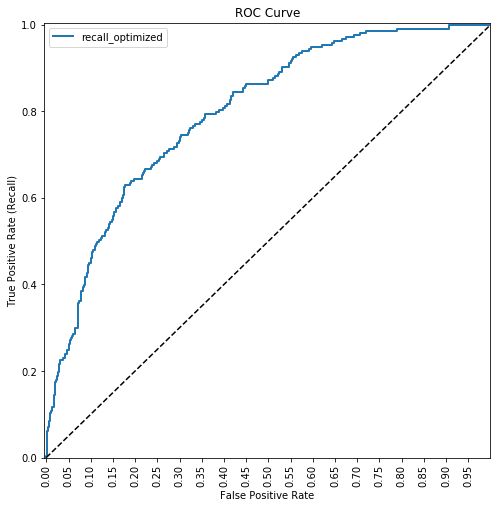

In [79]:
fpr, tpr, auc_thresholds = roc_curve(y_real, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [80]:
y = val_labels[:,1][val_labels[:,1]>0]
yhat = val_outputs[:,1][val_labels[:,1]>0]

In [81]:
RMSE = np.sqrt(np.mean((y - yhat)**2))
RMSE

1041.6816

In [82]:
y = Y_val
p = val_outputs[:,0]
f2 = val_outputs[:,1]
yhat = (1-p)*f2

In [83]:
RMSE = np.sqrt(np.mean((y - yhat)**2))
RMSE

927.7569131933697

In [84]:
print(np.cov(y, p))

[[ 9.70960988e+05 -3.62803059e+01]
 [-3.62803059e+01  3.60496616e-02]]


In [85]:
print(np.cov(f2, p))

[[ 7.87549824e+04 -3.08779081e+01]
 [-3.08779081e+01  3.60496616e-02]]
